# Figure 5

Analysis of validation experiments

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
import os
import functools
import upsetplot
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

warnings.filterwarnings('ignore')
plt.rc('font', family='Helvetica')

# 5b

In [18]:
validation = pd.read_excel('B-ALL validation.xlsx')

#exclude gRNA 4
validation = validation[validation['sgRNA']!='ABE4']

holder = []
for i in np.unique(validation['sgRNA']):
    initial_perc = validation[(validation['sgRNA']==i) & (validation['Timepoint']=='Initial')]['Percent_population'].values[0]
    subset = validation[validation['sgRNA']==i]
    subset['FoldChange'] = np.asarray(subset['Percent_population'])/initial_perc
    subset['LFC'] = np.log2(np.asarray(subset['Percent_population'])/initial_perc)
    holder.append(subset)

validation_lfc = pd.concat(holder)


gRNA_dict = {'ABE2':'gRNA_13607',
'ABE1':	'gRNA_12604',
'ABE8':	'gRNA_2474',
'ABE15': 'gRNA_12386',
'ABE3':	'gRNA_2458',
'ABE17':'gRNA_11607',
'CBE13': 'gRNA_10211',
'CBE14':'gRNA_4802',
'CBE16':'gRNA_13292',
'ABE6':	'gRNA_10342',
'ABE10': 'gRNA_12164',
'CBE9':	'gRNA_12312',
'CBE11':'gRNA_8280',
'CBE12':'gRNA_10131'}
#'ABE12':'gRNA_31',


validation_lfc['gRNA_id'] = [gRNA_dict[i] for i in validation_lfc['sgRNA']]

ABE_LFC = pd.read_csv('ABE_LFC_FDR_df.csv')
ABE_info = ABE_LFC[['gRNA_id', 'Gene', 'gene_name_h', 'HGVSp_m', 'HGVSp_h', 'classification']]
ABE_info['Editor']='ABE'

CBE_LFC = pd.read_csv('CBE_LFC_FDR_df.csv')
CBE_info = CBE_LFC[['gRNA_id', 'Gene', 'gene_name_h', 'HGVSp_m', 'HGVSp_h', 'classification']]
CBE_info['Editor']='CBE'

comb_info = pd.concat((ABE_info, CBE_info))

validation_merged = pd.merge(validation_lfc, comb_info, on='gRNA_id')

validation_merged['Name'] = [f'{val["gene_name_h"]} {val["HGVSp_h"]} \n{val["Gene"]} {val["HGVSp_m"]}' for i, val in validation_merged.iterrows()]
validation_merged

,sgRNA,Percent_population,Timepoint,Tissue,FoldChange,LFC,gRNA_id,Gene,gene_name_h,HGVSp_m,HGVSp_h,classification,Editor,Name
0,ABE1,16.6,Initial,In Vitro,1.000000,0.000000,gRNA_12604,Trp53,TP53,R277G,R280G,targeting guide,ABE,TP53 R280G \nTrp53 R277G
1,ABE1,22.6,Final,In Vitro,1.361446,0.445140,gRNA_12604,Trp53,TP53,R277G,R280G,targeting guide,ABE,TP53 R280G \nTrp53 R277G
2,ABE1,25.2,Final,In Vitro,1.518072,0.602240,gRNA_12604,Trp53,TP53,R277G,R280G,targeting guide,ABE,TP53 R280G \nTrp53 R277G
3,ABE1,20.8,Final,In Vitro,1.253012,0.325400,gRNA_12604,Trp53,TP53,R277G,R280G,targeting guide,ABE,TP53 R280G \nTrp53 R277G
4,ABE1,69.6,Final,Spleen,4.192771,2.067904,gRNA_12604,Trp53,TP53,R277G,R280G,targeting guide,ABE,TP53 R280G \nTrp53 R277G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,CBE9,18.8,Final,Bone Marrow,1.553719,0.635726,gRNA_12312,Tek,TEK,R167W,R167W,targeting guide,CBE,TEK R167W \nTek R167W
247,CBE9,29.2,Final,Meninges,2.413223,1.270961,gRNA_12312,Tek,TEK,R167W,R167W,targeting guide,CBE,TEK R167W \nTek R167W
248,CBE9,22.7,Final,Meninges,1.876033,0.907685,gRNA_12312,Tek,TEK,R167W,R167W,targeting guide,CBE,TEK R167W \nTek R167W
249,CBE9,36.0,Final,Meninges,2.975207,1.572990,gRNA_12312,Tek,TEK,R167W,R167W,targeting guide,CBE,TEK R167W \nTek R167W


In [19]:
#and do the comparison
guides = np.unique(validation_merged['gRNA_id'])

ABE_LFC = pd.read_csv('ABE_LFC_FDR_df.csv')
CBE_LFC = pd.read_csv('CBE_LFC_FDR_df.csv')
ABE_LFC['Editor']='ABE'
CBE_LFC['Editor']='CBE'

a2 = pd.concat((ABE_LFC, CBE_LFC))
screen_data = a2[a2['gRNA_id'].isin(guides)]

sp = ['spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5', 'spleen6','spleen7', 'spleen8', 'spleen9']
bm = ['bonemarrow1', 'bonemarrow2','bonemarrow3', 'bonemarrow4', 'bonemarrow5','bonemarrow6', 'bonemarrow7','bonemarrow8', 'bonemarrow9', 'bonemarrow10']
men = ['meninges1', 'meninges2', 'meninges3','meninges4', 'meninges5','meninges6', 'meninges7','meninges8', 'meninges9', 'meninges10']
iv = ['d15_rep1','d15_rep2', 'd15_rep3']


sp_std = []
bm_std = []
men_std = []
iv_std = []
for i, val in screen_data.iterrows():
    g = val['gRNA_id']
    subset = screen_data[screen_data['gRNA_id']==g]
    sp1 = np.asarray(subset[sp].dropna(axis=1))
    men1 = np.asarray(subset[men].dropna(axis=1))
    bm1 = np.asarray(subset[bm].dropna(axis=1))
    iv1 = np.asarray(subset[iv].dropna(axis=1))

    sp_std.append(np.std(sp1))
    bm_std.append(np.std(bm1))
    men_std.append(np.std(men1))
    iv_std.append(np.std(iv1))

screen_data['spleen_std'] = sp_std
screen_data['bm_std'] = bm_std
screen_data['meninges_std'] = men_std
screen_data['iv_std'] = iv_std

screen_data_medians = screen_data[['gRNA_id', 'LFC_median_meninges', 'LFC_median_spleen', 'LFC_median_bonemarrow', 'LFC_median_d15', 'Editor', 'spleen_std', 'bm_std', 'meninges_std', 'iv_std']]


data_val = pd.DataFrame(dict(zip(['gRNA_id', 'median_Meninges', 'median_Spleen', 'median_In Vitro', 'median_Bone Marrow'], [guides, np.zeros(len(guides)),np.zeros(len(guides)),np.zeros(len(guides)),np.zeros(len(guides))])))

for guide in guides:

    subset = validation_merged[(validation_merged['gRNA_id']==guide) & (validation_merged['Timepoint']=='Final')]

    for k in ['In Vitro', 'Spleen', 'Bone Marrow', 'Meninges']:
        lfcs = subset[subset['Tissue']==k]['LFC']
        med = np.median(lfcs)
        std = np.std(lfcs)

        data_val.loc[data_val['gRNA_id']==guide, f'median_{k}'] = med
        data_val.loc[data_val['gRNA_id']==guide, f'std_{k}'] = std

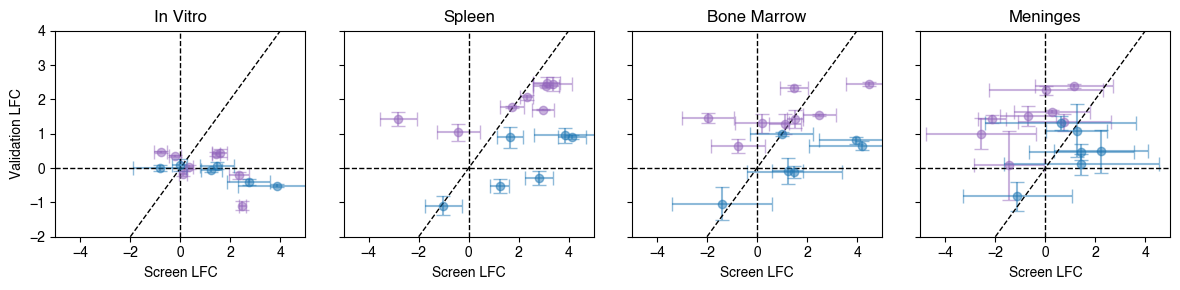

In [20]:
m1 = pd.merge(screen_data_medians, data_val, on='gRNA_id')
m1_ABE = m1[m1['Editor']=='ABE']
m1_CBE = m1[m1['Editor']=='CBE']

fig, ax = plt.subplots(1,4, figsize=(12,3), sharex=True, sharey=True)


#first plot ABE in errorbar format
ax[0].errorbar(m1_ABE['LFC_median_d15'], m1_ABE['median_In Vitro'], xerr=m1_ABE['iv_std'], yerr=m1_ABE['std_In Vitro'], color='tab:purple',fmt='o', capsize=5, alpha=.5)
ax[0].errorbar(m1_CBE['LFC_median_d15'], m1_CBE['median_In Vitro'], xerr=m1_CBE['iv_std'], yerr=m1_CBE['std_In Vitro'], color='tab:blue',fmt='o', capsize=5, alpha=.5)
ax[0].set_title('In Vitro')

ax[1].errorbar(m1_ABE['LFC_median_spleen'], m1_ABE['median_Spleen'], xerr=m1_ABE['spleen_std'], yerr=m1_ABE['std_Spleen'], color='tab:purple',fmt='o', capsize=5, alpha=.5)
ax[1].errorbar(m1_CBE['LFC_median_spleen'], m1_CBE['median_Spleen'], xerr=m1_CBE['spleen_std'], yerr=m1_CBE['std_Spleen'], color='tab:blue',fmt='o', capsize=5, alpha=.5)
ax[1].set_title('Spleen')


ax[2].errorbar(m1_ABE['LFC_median_bonemarrow'], m1_ABE['median_Bone Marrow'], xerr=m1_ABE['bm_std'], yerr=m1_ABE['std_Bone Marrow'], color='tab:purple',fmt='o', capsize=5, alpha=.5)
ax[2].errorbar(m1_CBE['LFC_median_bonemarrow'], m1_CBE['median_Bone Marrow'], xerr=m1_CBE['bm_std'], yerr=m1_CBE['std_Bone Marrow'], color='tab:blue',fmt='o', capsize=5, alpha=.5)
ax[2].set_title('Bone Marrow')


ax[3].errorbar(m1_ABE['LFC_median_meninges'], m1_ABE['median_Meninges'], xerr=m1_ABE['meninges_std'], yerr=m1_ABE['std_Meninges'], color='tab:purple',fmt='o', capsize=5, alpha=.5)
ax[3].errorbar(m1_CBE['LFC_median_meninges'], m1_CBE['median_Meninges'], xerr=m1_CBE['meninges_std'], yerr=m1_CBE['std_Meninges'], color='tab:blue',fmt='o', capsize=5, alpha=.5)
ax[3].set_title('Meninges')

ax[0].set_ylabel('Validation LFC')


for i in range(4):
    ax[i].set_xlabel('Screen LFC')
    ax[i].axvline(0, color='black', linestyle='dashed', linewidth=1)
    ax[i].axhline(0, color='black', linestyle='dashed', linewidth=1)
    ax[i].axline((1, 1), slope=1, color='black',linestyle='dashed', linewidth=1)


ax[0].set_xlim(-5,5)
ax[1].set_ylim(-2,4)
fig.tight_layout()

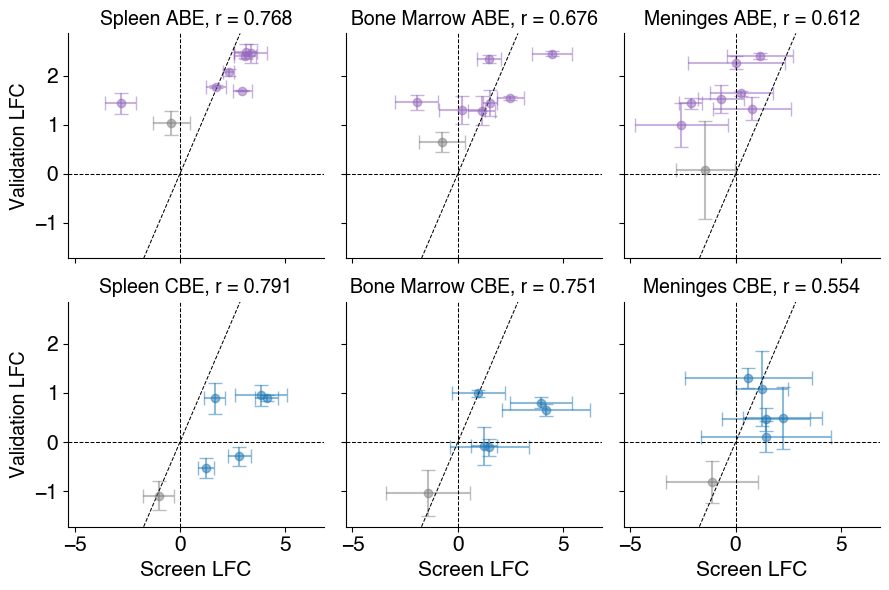

In [21]:
#m1 = pd.merge(screen_data_medians[screen_data_medians['gRNA_id']!='gRNA_2458'], data_val, on='gRNA_id')
g_info = validation_merged[['gRNA_id', 'Gene', 'gene_name_h', 'HGVSp_m', 'HGVSp_h', 'classification', 'Name']].drop_duplicates().reset_index(drop=True)

m1 = pd.merge(screen_data_medians, data_val, on='gRNA_id')
m1 = pd.merge(m1, g_info, on='gRNA_id')

m1_ABE = m1[m1['Editor']=='ABE']
m1_CBE = m1[m1['Editor']=='CBE']

fig, ax = plt.subplots(2,3, figsize=(9,6), sharex=True, sharey=True)

name_dict = {'spleen': 'Spleen', 'bonemarrow':'Bone Marrow', 'meninges':'Meninges'}
nd2 = {'spleen': 'spleen', 'bonemarrow':'bm', 'meninges':'meninges'}
#first plot ABE in errorbar format
for i, val in enumerate(name_dict.keys()):

    k = name_dict[val]
    k2 = nd2[val]

    targ_ABE = m1_ABE[m1_ABE['classification']=='targeting guide']
    targ_CBE = m1_CBE[m1_CBE['classification']=='targeting guide']
    control_ABE = m1_ABE[m1_ABE['classification']!='targeting guide']
    control_CBE = m1_CBE[m1_CBE['classification']!='targeting guide']

    ax[0][i].errorbar(targ_ABE[f'LFC_median_{val}'], targ_ABE[f'median_{k}'], xerr=targ_ABE[f'{k2}_std'], yerr=targ_ABE[f'std_{k}'], color='tab:purple',fmt='o', capsize=5, alpha=.5)
    ax[1][i].errorbar(targ_CBE[f'LFC_median_{val}'], targ_CBE[f'median_{k}'], xerr=targ_CBE[f'{k2}_std'], yerr=targ_CBE[f'std_{k}'], color='tab:blue',fmt='o', capsize=5, alpha=.5)
    ax[0][i].errorbar(control_ABE[f'LFC_median_{val}'], control_ABE[f'median_{k}'], xerr=control_ABE[f'{k2}_std'], yerr=control_ABE[f'std_{k}'], color='tab:grey',fmt='o', capsize=5, alpha=.5)
    ax[1][i].errorbar(control_CBE[f'LFC_median_{val}'], control_CBE[f'median_{k}'], xerr=control_CBE[f'{k2}_std'], yerr=control_CBE[f'std_{k}'], color='tab:grey',fmt='o', capsize=5, alpha=.5)


    a1_p = np.round(scipy.stats.pearsonr(m1_ABE[f'LFC_median_{val}'], m1_ABE[f'median_{k}']).statistic,3)
    a2_p = np.round(scipy.stats.pearsonr(m1_CBE[f'LFC_median_{val}'], m1_CBE[f'median_{k}']).statistic,3)
    ax[0][i].set_title(f'{k} ABE, r = {a1_p}', fontsize=14)
    ax[1][i].set_title(f'{k} CBE, r = {a2_p}', fontsize=14)


ax[0][0].set_ylabel('Validation LFC', fontsize=14)
ax[1][0].set_ylabel('Validation LFC', fontsize=14)


for i in range(3):
    ax[1][i].set_xlabel('Screen LFC', fontsize=15)
    ax[0][i].axvline(0, color='black', linestyle='dashed', linewidth=.75)
    ax[1][i].axvline(0, color='black', linestyle='dashed', linewidth=.75)

    ax[0][i].axhline(0, color='black', linestyle='dashed', linewidth=.75)
    ax[1][i].axhline(0, color='black', linestyle='dashed', linewidth=.75)

    ax[0][i].axline((1, 1), slope=1, color='black',linestyle='dashed', linewidth=.75)
    ax[1][i].axline((1, 1), slope=1, color='black',linestyle='dashed', linewidth=.75)

    #ax[1].plot([0,8], [0,0], color='black', linestyle='dashed')
    ax[0][i].spines[['top', 'right']].set_visible(False)
    ax[1][i].spines[['top', 'right']].set_visible(False)

    ax[0][i].tick_params(axis='both', which='major', labelsize=15)
    ax[1][i].tick_params(axis='both', which='major', labelsize=15)

    #ax.tick_params(axis='y', which='major', labelsize=15)

#ax[0].set_xlim(-5,5)
#ax[1].set_ylim(-2,4)
fig.tight_layout()
#fig.savefig('figures/validation_gRNA_scatter.pdf')

# 5c

In [22]:
CBE_samp_dict = {'spleen':['spleen1','spleen2','spleen3','spleen4','spleen5','spleen6','spleen7','spleen8','spleen9'],
    'bonemarrow':['bonemarrow1','bonemarrow2','bonemarrow3','bonemarrow4','bonemarrow5','bonemarrow6','bonemarrow7','bonemarrow8','bonemarrow9','bonemarrow10'],
    'meninges':['meninges1','meninges2','meninges3','meninges4','meninges5','meninges6','meninges7','meninges8','meninges9','meninges10',],
    'd5':['d5_rep1','d5_rep2','d5_rep3'],
    'd15':['d15_rep1','d15_rep2','d15_rep3'],
    'plasmid_lib':['plasmidlib']}

ABE_samp_dict = {'spleen':['spleen1','spleen2','spleen3','spleen4'],
'bonemarrow':['bonemarrow1','bonemarrow2','bonemarrow3','bonemarrow4','bonemarrow5'],
'meninges':['meninges1','meninges2','meninges3','meninges4','meninges5'],
'd5':['d5_rep1','d5_rep2','d5_rep3'],
'd15':['d15_rep1','d15_rep2','d15_rep3'],
'plasmid_lib':['plasmidlib']}

screen_data_ABE = screen_data[screen_data['Editor']=='ABE']
screen_data_CBE = screen_data[screen_data['Editor']=='CBE']


tissue_holder = []
LFC_holder = []
gRNA_holder = []

tissues = ['spleen', 'bonemarrow', 'meninges', 'd15']
tissue_dict = {'spleen':'Spleen', 'bonemarrow': 'Bone Marrow', 'meninges':'Meninges', 'd15':'In Vitro'}
for guide in np.unique(screen_data_ABE['gRNA_id']):
    
    for tissue in tissues:
        a = ABE_samp_dict[tissue]

        for k in a:
            j = screen_data_ABE.loc[screen_data_ABE['gRNA_id']==guide, k].values[0]
            LFC_holder.append(j)
            gRNA_holder.append(guide)
            tissue_holder.append(tissue_dict[tissue])
            
screen_ABE_reformat = pd.DataFrame(dict(zip(['gRNA_id', 'LFC', 'Tissue'], [gRNA_holder, LFC_holder, tissue_holder])))
screen_ABE_reformat['Condition'] = 'Screen'

#----and CBE
tissue_holder = []
LFC_holder = []
gRNA_holder = []

tissues = ['spleen', 'bonemarrow', 'meninges', 'd15']
tissue_dict = {'spleen':'Spleen', 'bonemarrow': 'Bone Marrow', 'meninges':'Meninges', 'd15':'In Vitro'}
for guide in np.unique(screen_data_CBE['gRNA_id']):
    
    for tissue in tissues:
        a = CBE_samp_dict[tissue]

        for k in a:
            j = screen_data_CBE.loc[screen_data_CBE['gRNA_id']==guide, k].values[0]
            LFC_holder.append(j)
            gRNA_holder.append(guide)
            tissue_holder.append(tissue_dict[tissue])
            
screen_CBE_reformat = pd.DataFrame(dict(zip(['gRNA_id', 'LFC', 'Tissue'], [gRNA_holder, LFC_holder, tissue_holder])))
screen_CBE_reformat['Condition'] = 'Screen'


In [23]:
g_order_ABE = list(m1_ABE.sort_values(by='LFC_median_spleen', ascending=False)['gRNA_id'])
names_ABE = list(m1_ABE.sort_values(by='LFC_median_spleen', ascending=False)['Name'])
g_order_CBE = list(m1_CBE.sort_values(by='LFC_median_spleen', ascending=False)['gRNA_id'])
names_CBE = list(m1_CBE.sort_values(by='LFC_median_spleen', ascending=False)['Name'])

names_ABE2 = ['Non-targeting\nControl' if x == 'nan nan \nnon_target Non-coding' else x for x in names_ABE]
names_CBE2 = ['Safe-targeting\nControl' if x == 'nan nan \nsafe_target Non-coding' else x for x in names_CBE]

In [24]:
val_ABE = validation_merged[(validation_merged['Editor']=='ABE') & (validation_merged['Timepoint']=='Final')]
val_CBE = validation_merged[(validation_merged['Editor']=='CBE') & (validation_merged['Timepoint']=='Final')]

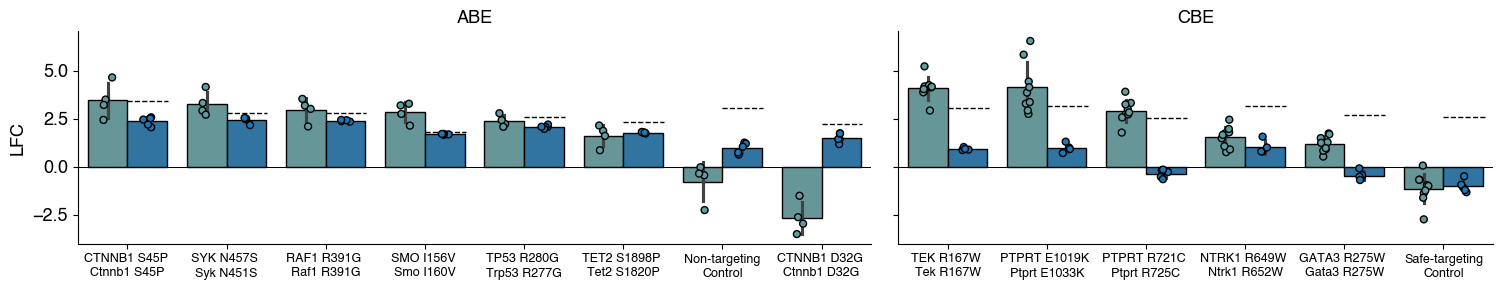

In [25]:
val_CBE['Condition'] = 'Validation'
CBE1 = pd.concat((screen_CBE_reformat, val_CBE))

val_ABE['Condition'] = 'Validation'
ABE1 = pd.concat((screen_ABE_reformat, val_ABE))


fig, ax = plt.subplots(1,2, figsize=(15,3), width_ratios=[8,6], sharey=True)
tissue = 'Spleen'

palette = ['lightgrey','cadetblue','slateblue','lightcoral', '#ED6A50',]
pal_iv = ['lightgrey', 'tab:grey']
pal_spleen = ['cadetblue', 'tab:blue']
pal_bon = ['slateblue', 'indigo']
pal_men = ['lightcoral', 'tab:red']

pal_chosen = pal_spleen
sns.stripplot(data=ABE1[ABE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', dodge=True, legend=False, ax=ax[0], palette=pal_chosen, edgecolor='black', linewidth=1, order=g_order_ABE)
sns.barplot(data=ABE1[ABE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', errorbar='sd', legend=False,ax=ax[0], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_ABE)
sns.stripplot(data=CBE1[CBE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', dodge=True, legend=False, ax=ax[1], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_CBE)
sns.barplot(data=CBE1[CBE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', errorbar='sd',legend=False,ax=ax[1], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_CBE)


ax[0].axhline(0, color='black',  linewidth=.75)
ax[1].axhline(0, color='black', linewidth=.75)

#plot theoretical maximum LFC for each gRNA given the initial BFP+%
initial = validation_merged[validation_merged['Timepoint']=='Initial']
for i, val in enumerate(g_order_ABE):
    init = initial.loc[initial['gRNA_id']==val, 'Percent_population'].values[0]
    ax[0].axhline(np.log2(100/init), xmin=0+i/8+1/16, xmax=i/8 + 1/8-1/90, color='black', linestyle='dashed', linewidth=1)

for i, val in enumerate(g_order_CBE):
    init = initial.loc[initial['gRNA_id']==val, 'Percent_population'].values[0]
    ax[1].axhline(np.log2(100/init), xmin=0+i/6+1/12, xmax=i/6 + 1/6-1/70, color='black', linestyle='dashed', linewidth=1)

#ax[1].plot([0,8], [0,0], color='black', linestyle='dashed')
ax[0].spines[['top', 'right']].set_visible(False)
ax[1].spines[['top', 'right']].set_visible(False)

ax[0].tick_params(axis='x', which='major', labelsize=9)
ax[0].tick_params(axis='y', which='major', labelsize=13)

ax[1].tick_params(axis='x', which='major', labelsize=9)

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('LFC', fontsize=13)

ax[0].set_xticklabels(names_ABE2)
ax[1].set_xticklabels(names_CBE2)
ax[0].set_title('ABE', fontsize=13)
ax[1].set_title('CBE', fontsize=13)

fig.tight_layout()

# 5d

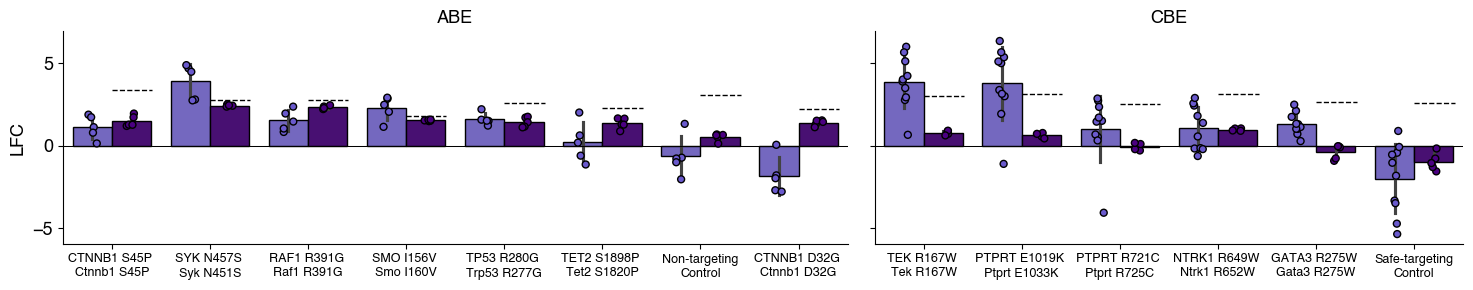

In [26]:
val_CBE['Condition'] = 'Validation'
CBE1 = pd.concat((screen_CBE_reformat, val_CBE))

val_ABE['Condition'] = 'Validation'
ABE1 = pd.concat((screen_ABE_reformat, val_ABE))


fig, ax = plt.subplots(1,2, figsize=(15,3), width_ratios=[8,6], sharey=True)
tissue = 'Bone Marrow'

palette = ['lightgrey','cadetblue','slateblue','lightcoral', '#ED6A50',]
pal_iv = ['lightgrey', 'tab:grey']
pal_spleen = ['cadetblue', 'tab:blue']
pal_bon = ['slateblue', 'indigo']
pal_men = ['lightcoral', 'tab:red']

pal_chosen = pal_bon
sns.stripplot(data=ABE1[ABE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', dodge=True, legend=False, ax=ax[0], palette=pal_chosen, edgecolor='black', linewidth=1, order=g_order_ABE)
sns.barplot(data=ABE1[ABE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', errorbar='sd', legend=False,ax=ax[0], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_ABE)
sns.stripplot(data=CBE1[CBE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', dodge=True, legend=False, ax=ax[1], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_CBE)
sns.barplot(data=CBE1[CBE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', errorbar='sd',legend=False,ax=ax[1], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_CBE)


ax[0].axhline(0, color='black',  linewidth=.75)
ax[1].axhline(0, color='black', linewidth=.75)

#plot theoretical maximum LFC for each gRNA given the initial BFP+%
initial = validation_merged[validation_merged['Timepoint']=='Initial']
for i, val in enumerate(g_order_ABE):
    init = initial.loc[initial['gRNA_id']==val, 'Percent_population'].values[0]
    ax[0].axhline(np.log2(100/init), xmin=0+i/8+1/16, xmax=i/8 + 1/8-1/90, color='black', linestyle='dashed', linewidth=1)

for i, val in enumerate(g_order_CBE):
    init = initial.loc[initial['gRNA_id']==val, 'Percent_population'].values[0]
    ax[1].axhline(np.log2(100/init), xmin=0+i/6+1/12, xmax=i/6 + 1/6-1/70, color='black', linestyle='dashed', linewidth=1)

#ax[1].plot([0,8], [0,0], color='black', linestyle='dashed')
ax[0].spines[['top', 'right']].set_visible(False)
ax[1].spines[['top', 'right']].set_visible(False)

ax[0].tick_params(axis='x', which='major', labelsize=9)
ax[0].tick_params(axis='y', which='major', labelsize=13)

ax[1].tick_params(axis='x', which='major', labelsize=9)

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('LFC', fontsize=13)

ax[0].set_xticklabels(names_ABE2)
ax[1].set_xticklabels(names_CBE2)
ax[0].set_title('ABE', fontsize=13)
ax[1].set_title('CBE', fontsize=13)

fig.tight_layout()

# 5e

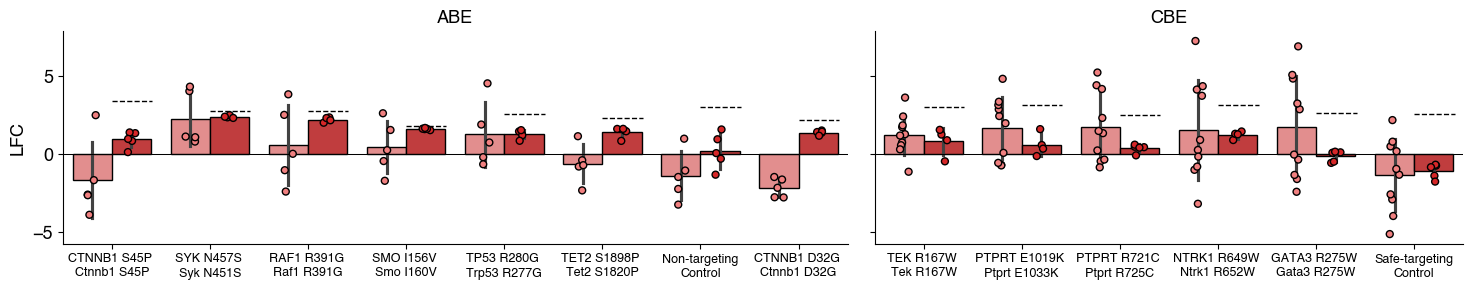

In [27]:
val_CBE['Condition'] = 'Validation'
CBE1 = pd.concat((screen_CBE_reformat, val_CBE))

val_ABE['Condition'] = 'Validation'
ABE1 = pd.concat((screen_ABE_reformat, val_ABE))


fig, ax = plt.subplots(1,2, figsize=(15,3), width_ratios=[8,6], sharey=True)
tissue = 'Meninges'

palette = ['lightgrey','cadetblue','slateblue','lightcoral', '#ED6A50',]
pal_iv = ['lightgrey', 'tab:grey']
pal_spleen = ['cadetblue', 'tab:blue']
pal_bon = ['slateblue', 'indigo']
pal_men = ['lightcoral', 'tab:red']

pal_chosen = pal_men
sns.stripplot(data=ABE1[ABE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', dodge=True, legend=False, ax=ax[0], palette=pal_chosen, edgecolor='black', linewidth=1, order=g_order_ABE)
sns.barplot(data=ABE1[ABE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', errorbar='sd', legend=False,ax=ax[0], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_ABE)
sns.stripplot(data=CBE1[CBE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', dodge=True, legend=False, ax=ax[1], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_CBE)
sns.barplot(data=CBE1[CBE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', errorbar='sd',legend=False,ax=ax[1], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_CBE)


ax[0].axhline(0, color='black',  linewidth=.75)
ax[1].axhline(0, color='black', linewidth=.75)

#plot theoretical maximum LFC for each gRNA given the initial BFP+%
initial = validation_merged[validation_merged['Timepoint']=='Initial']
for i, val in enumerate(g_order_ABE):
    init = initial.loc[initial['gRNA_id']==val, 'Percent_population'].values[0]
    ax[0].axhline(np.log2(100/init), xmin=0+i/8+1/16, xmax=i/8 + 1/8-1/90, color='black', linestyle='dashed', linewidth=1)

for i, val in enumerate(g_order_CBE):
    init = initial.loc[initial['gRNA_id']==val, 'Percent_population'].values[0]
    ax[1].axhline(np.log2(100/init), xmin=0+i/6+1/12, xmax=i/6 + 1/6-1/70, color='black', linestyle='dashed', linewidth=1)

#ax[1].plot([0,8], [0,0], color='black', linestyle='dashed')
ax[0].spines[['top', 'right']].set_visible(False)
ax[1].spines[['top', 'right']].set_visible(False)

ax[0].tick_params(axis='x', which='major', labelsize=9)
ax[0].tick_params(axis='y', which='major', labelsize=13)

ax[1].tick_params(axis='x', which='major', labelsize=9)

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('LFC', fontsize=13)

ax[0].set_xticklabels(names_ABE2)
ax[1].set_xticklabels(names_CBE2)
ax[0].set_title('ABE', fontsize=13)
ax[1].set_title('CBE', fontsize=13)

fig.tight_layout()
#fig.savefig(f'figures/{tissue}_barplot_validation_v2_w_max.pdf')

# 5f

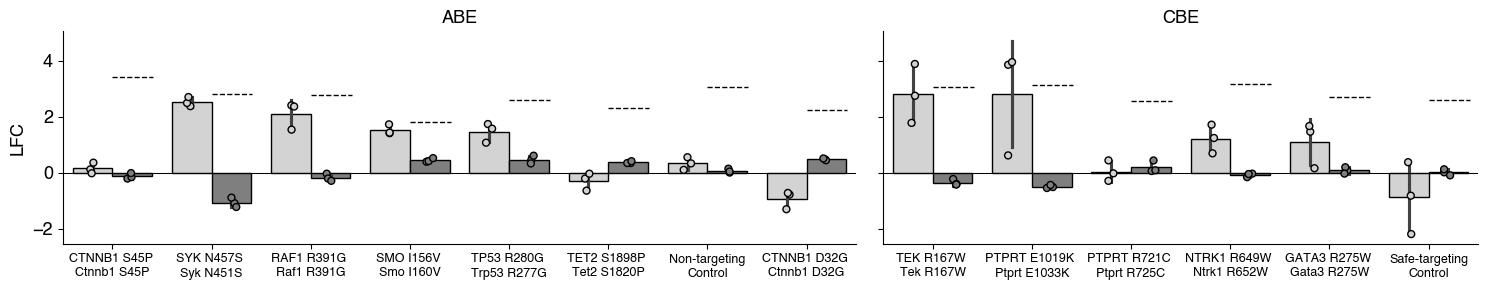

In [28]:
val_CBE['Condition'] = 'Validation'
CBE1 = pd.concat((screen_CBE_reformat, val_CBE))

val_ABE['Condition'] = 'Validation'
ABE1 = pd.concat((screen_ABE_reformat, val_ABE))


fig, ax = plt.subplots(1,2, figsize=(15,3), width_ratios=[8,6], sharey=True)
tissue = 'In Vitro'

palette = ['lightgrey','cadetblue','slateblue','lightcoral', '#ED6A50',]
pal_iv = ['lightgrey', 'tab:grey']
pal_spleen = ['cadetblue', 'tab:blue']
pal_bon = ['slateblue', 'indigo']
pal_men = ['lightcoral', 'tab:red']

pal_chosen = pal_iv
sns.stripplot(data=ABE1[ABE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', dodge=True, legend=False, ax=ax[0], palette=pal_chosen, edgecolor='black', linewidth=1, order=g_order_ABE)
sns.barplot(data=ABE1[ABE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', errorbar='sd', legend=False,ax=ax[0], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_ABE)
sns.stripplot(data=CBE1[CBE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', dodge=True, legend=False, ax=ax[1], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_CBE)
sns.barplot(data=CBE1[CBE1['Tissue']==tissue], x='gRNA_id', y='LFC', hue='Condition', errorbar='sd',legend=False,ax=ax[1], edgecolor='black', palette=pal_chosen, linewidth=1, order=g_order_CBE)


ax[0].axhline(0, color='black',  linewidth=.75)
ax[1].axhline(0, color='black', linewidth=.75)

#plot theoretical maximum LFC for each gRNA given the initial BFP+%
initial = validation_merged[validation_merged['Timepoint']=='Initial']
for i, val in enumerate(g_order_ABE):
    init = initial.loc[initial['gRNA_id']==val, 'Percent_population'].values[0]
    ax[0].axhline(np.log2(100/init), xmin=0+i/8+1/16, xmax=i/8 + 1/8-1/90, color='black', linestyle='dashed', linewidth=1)

for i, val in enumerate(g_order_CBE):
    init = initial.loc[initial['gRNA_id']==val, 'Percent_population'].values[0]
    ax[1].axhline(np.log2(100/init), xmin=0+i/6+1/12, xmax=i/6 + 1/6-1/70, color='black', linestyle='dashed', linewidth=1)

#ax[1].plot([0,8], [0,0], color='black', linestyle='dashed')
ax[0].spines[['top', 'right']].set_visible(False)
ax[1].spines[['top', 'right']].set_visible(False)

ax[0].tick_params(axis='x', which='major', labelsize=9)
ax[0].tick_params(axis='y', which='major', labelsize=13)

ax[1].tick_params(axis='x', which='major', labelsize=9)

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('LFC', fontsize=13)

ax[0].set_xticklabels(names_ABE2)
ax[1].set_xticklabels(names_CBE2)
ax[0].set_title('ABE', fontsize=13)
ax[1].set_title('CBE', fontsize=13)

fig.tight_layout()